In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas_profiling
from pandas_profiling import ProfileReport
from IPython.display import display
pd.options.display.max_columns = None
from datetime import date, datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline
from pandas.plotting import scatter_matrix


listings = pd.read_csv("../Los_Angeles/listings.csv")
reviews = pd.read_csv("../Los_Angeles/reviews.csv")
calendar = pd.read_csv("../Los_Angeles/calendar.csv")



In [251]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20200820033927,2020-08-21,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,NaN,0%,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,Culver City,Other Cities,33.98209,-118.38494,Entire condominium,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""Smoke alarm"", ""Hot tub"", ""Indoor fireplace"",...",$115.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,142,2020-08-21,2,0,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20200820033927,2020-08-22,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,Quiet-yet-close to all the fun in LA! Hollywoo...,https://a0.muscache.com/pictures/cc4b724d-db8b...,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,70%,36%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, California, United States",Burbank,Other Cities,34.16562,-118.33458,Entire house,Entire home/apt,6,NaN,1 bath,3.0,3.0,"[""Fireplace guards"", ""Children\u2019s dinnerwa...",$176.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,0,0,0,0,2020-08-22,8,2,0,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.16


In [252]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...


In [253]:
calendar.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,12320,2020-08-20,f,$145.00,$145.00,31.0,150.0
1,12320,2020-08-21,f,$179.00,$179.00,31.0,150.0


In [254]:
listings.shape

(33078, 74)

In [255]:
reviews.shape

(1171855, 6)

In [256]:
calendar.shape

(12072921, 7)

In [257]:
listings.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                2
description                                      1164
neighborhood_overview                           11315
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           9
host_since                                          9
host_location                                      94
host_about                                      12006
host_response_time                               9358
host_response_rate                               9358
host_acceptance_rate                             6727
host_is_superhost                                   9
host_thumbnail_url          

In [258]:
##Function to retun the columns with more than missingCutoff% missing values.

In [259]:
def getMissingValues(missingCutoff):
    # Function to retun the columns with more than missingCutoff% missing values.
    # argument: missingCutoff, % values threshold for missing values
    missing = round(100*(listings.isnull().sum()/listings.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [260]:
def imputeNan(data,imputeColList=False,missingColList=False):
    # Function impute the nan with 0
    # argument: colList, list of columns for which nan is to be replaced with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [261]:
getMissingValues(50)

There are 3 features having more than 50% missing values/entries


bathrooms           100.0
calendar_updated    100.0
license              75.0
dtype: float64

In [262]:
missingcol = list(getMissingValues(50).index)
listings.drop(missingcol,axis=1,inplace=True)
listings.shape

There are 3 features having more than 50% missing values/entries


(33078, 71)

In [263]:
getMissingValues(0)

There are 20 features having more than 0% missing values/entries


description                     4.0
neighborhood_overview          34.0
host_about                     36.0
host_response_time             28.0
host_response_rate             28.0
host_acceptance_rate           20.0
host_neighbourhood             20.0
neighbourhood                  34.0
bedrooms                       11.0
beds                            1.0
first_review                   22.0
last_review                    22.0
review_scores_rating           23.0
review_scores_accuracy         23.0
review_scores_cleanliness      23.0
review_scores_checkin          23.0
review_scores_communication    23.0
review_scores_location         23.0
review_scores_value            23.0
reviews_per_month              22.0
dtype: float64

In [264]:
calendar.set_index('listing_id', inplace=True)

In [265]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12072921 entries, 12320 to 44601976
Data columns (total 6 columns):
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), object(4)
memory usage: 644.8+ MB


In [266]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171855 entries, 0 to 1171854
Data columns (total 6 columns):
listing_id       1171855 non-null int64
id               1171855 non-null int64
date             1171855 non-null object
reviewer_id      1171855 non-null int64
reviewer_name    1171853 non-null object
comments         1170821 non-null object
dtypes: int64(3), object(3)
memory usage: 53.6+ MB


In [267]:
reviews.set_index('id', inplace=True)

In [268]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171855 entries, 449036 to 653959426
Data columns (total 5 columns):
listing_id       1171855 non-null int64
date             1171855 non-null object
reviewer_id      1171855 non-null int64
reviewer_name    1171853 non-null object
comments         1170821 non-null object
dtypes: int64(2), object(3)
memory usage: 53.6+ MB


In [269]:
calendar.date = pd.to_datetime(calendar.date)

In [270]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12072921 entries, 12320 to 44601976
Data columns (total 6 columns):
date              datetime64[ns]
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 644.8+ MB


In [271]:
reviews.date = pd.to_datetime(reviews.date)

In [272]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171855 entries, 449036 to 653959426
Data columns (total 5 columns):
listing_id       1171855 non-null int64
date             1171855 non-null datetime64[ns]
reviewer_id      1171855 non-null int64
reviewer_name    1171853 non-null object
comments         1170821 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 53.6+ MB


In [273]:
listings.set_index('id',inplace=True)

In [274]:
listings.price = listings.price.str.lstrip('$').str.replace(',', '').astype('float')

In [275]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33078 entries, 109 to 45031552
Data columns (total 70 columns):
listing_url                                     33078 non-null object
scrape_id                                       33078 non-null int64
last_scraped                                    33078 non-null object
name                                            33076 non-null object
description                                     31914 non-null object
neighborhood_overview                           21763 non-null object
picture_url                                     33078 non-null object
host_id                                         33078 non-null int64
host_url                                        33078 non-null object
host_name                                       33069 non-null object
host_since                                      33069 non-null object
host_location                                   32984 non-null object
host_about                                      

In [276]:
listings.last_scraped = pd.to_datetime(listings.last_scraped)

In [277]:
#Droping rows with price<=0,bedrooms<=0,accomodates<=0
listings = listings[listings.price > 0]
listings = listings[listings.bedrooms > 0]
listings = listings[listings.accommodates > 0]

In [278]:
listings.bedrooms = listings.bedrooms.astype('int')
listings.accommodates = listings.accommodates.astype('int')

In [279]:
listings.neighbourhood_cleansed.unique()

array(['Culver City', 'Burbank', 'Hollywood', 'Santa Monica',
       'Bellflower', 'Del Rey', 'Woodland Hills', 'Atwater Village',
       'Long Beach', 'Venice', 'Redondo Beach', 'Mid-Wilshire',
       'Hollywood Hills', 'Torrance', 'Mid-City', 'Valley Village',
       'Silver Lake', 'Glendale', 'Highland Park', 'Mount Washington',
       'Sawtelle', 'West Los Angeles', 'Los Feliz', 'Tarzana',
       'Mar Vista', 'Malibu', 'Hollywood Hills West', 'Downtown',
       'Van Nuys', 'Glassell Park', 'Lynwood', 'Granada Hills',
       'Beverly Hills', 'Carthay', 'Echo Park', 'Harvard Heights',
       'West Hollywood', 'Elysian Park', 'Beverlywood', 'Cheviot Hills',
       'Lakewood', 'North Hills', 'Tujunga', 'Westchester', 'Fairfax',
       'Westlake', 'North Hollywood', 'Altadena', 'Calabasas',
       'Pacific Palisades', 'Topanga', 'Valley Glen', 'Manhattan Beach',
       'Studio City', 'Unincorporated Santa Monica Mountains',
       'Elysian Valley', 'Palms', 'Pico-Robertson', 'Sun Valley

## CLEANING

## Delete rows that have 'Other Cities' or 'Unincorporated Areas'

In [280]:
# Since we want to do this project on the city of Los Angeles, we are taking out any data included in the listings dataset that is of any other city other than Los Angeles.

In [281]:
listings.neighbourhood_group_cleansed.unique()

array(['Other Cities', 'City of Los Angeles', 'Unincorporated Areas'],
      dtype=object)

In [282]:
indexneighbourhood=listings[listings['neighbourhood_group_cleansed']=='Other Cities'].index

In [283]:
listings.drop(indexneighbourhood, inplace=True)

In [284]:
listings.neighbourhood_group_cleansed.unique()

array(['City of Los Angeles', 'Unincorporated Areas'], dtype=object)

In [285]:
indexneighbourhood2=listings[listings['neighbourhood_group_cleansed']=='Unincorporated Areas'].index

In [286]:
listings.drop(indexneighbourhood2, inplace=True)

In [287]:
listings.neighbourhood_group_cleansed.unique()

array(['City of Los Angeles'], dtype=object)

In [288]:
listings.shape

(16560, 70)

## Exploratory Analysis

In [289]:
### Predict Superhost and what factors that correlate well with it.

In [1082]:
factors_df= listings.copy()

In [1083]:
#check whether we have our target column host_is_superhost has a value for all rows left
factors_df.host_is_superhost.count()

16555

In [1084]:
#drop those rows with no value since we only have 5 rows that don't have the value
factors_df[~factors_df['host_is_superhost'].isnull()]

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2708,https://www.airbnb.com/rooms/2708,20200820033927,2020-08-20,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beau Furn Mirror Mini-Suite w/ Fireplace 28% o...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/40618141/2ac0...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09768,-118.34602,Private room in apartment,Private room,1,1.5 baths,1,1.0,"[""Smoke alarm"", ""Hot tub"", ""Indoor fireplace"",...",67.0,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,12,42,317,2020-08-20,26,5,1,2014-06-09,2020-07-31,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2,0,2,0,0.34
5728,https://www.airbnb.com/rooms/5728,20200820033927,2020-08-21,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/7a29d275-f293...,9171,https://www.airbnb.com/users/show/9171,Sanni,2009-03-05,"Los Angeles, California, United States",we are loving our home and would like to share...,within an hour,100%,95%,t,https://a0.muscache.com/im/pictures/user/99373...,https://a0.muscache.com/im/pictures/user/99373...,Del Rey,8.0,8.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Del Rey,City of Los Angeles,33.98750,-118.43200,Private room in tiny house,Private room,2,1 shared bath,1,1.0,"[""Smoke alarm"", ""Private entrance"", ""Microwave...",55.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,18,48,78,291,2020-08-21,310,28,0,2009-07-17,2020-04-29,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f,4,1,3,0,2.29
5729,https://www.airbnb.com/rooms/5729,20200820033927,2020-08-20,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/f48e3ea8-2075...,9171,https://www.airbnb.com/users/show/9171,Sanni,2009-03-05,"Los Angeles, California, United States",we are loving our home and would like to share...,within an hour,100%,95%,t,https://a0.muscache.com/im/pictures/user/99373...,https://a0.muscache.com/im/pictures/user/99373...,Del Rey,8.0,8.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Del Rey,City of Los Angeles,33.98750,-118.

In [1085]:
#Those 5 rows are dropped here
factors_df.dropna(subset=['host_is_superhost'],inplace=True)

In [1086]:
factors_df.host_is_superhost.count()

16555

In [1087]:
factors_df.shape

(16555, 70)

In [1088]:
#categorizing number of listings with room type
room_type_count=factors_df.room_type.value_counts()

In [1089]:
room_type_count

Entire home/apt    10555
Private room        5021
Shared room          898
Hotel room            81
Name: room_type, dtype: int64

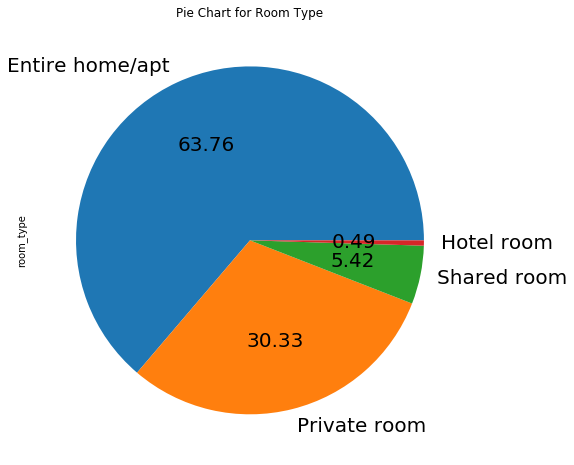

In [1090]:
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Pie Chart for Room Type');


### Categorize Property types in less categories (Cleaning).

In [1091]:
factors_df.replace(to_replace =["Private room in apartment", "Entire apartment","Shared room in apartment"],  
                           value ="Apartment", inplace=True) 

In [1092]:
factors_df.replace(to_replace =["Entire serviced apartment","Room in serviced apartment","Private room in serviced apartment","Shared room in serviced apartment"],  
                           value ="Serviced Apartment", inplace=True) 

In [1093]:
factors_df.replace(to_replace =["Private room in guesthouse", "Entire guesthouse","Shared room in guesthouse"],  
                           value ="Guesthouse", inplace=True) 

In [1094]:
factors_df.replace(to_replace =["Entire house", "Private room in house","Shared room in house"],
                           value ="House", inplace=True) 

In [1095]:
factors_df.replace(to_replace =["Private room in tiny house", "Tiny house"],
                           value ="Tiny House", inplace=True) 

In [1096]:
factors_df.replace(to_replace =["Entire bungalow", "Private room in bungalow","Shared room in bungalow"],
                           value ="Bungalow", inplace=True) 

In [1097]:
factors_df.replace(to_replace =["Entire guest suite", "Shared room in guest suite","Private room in guest suite"],
                           value ="Guest suite", inplace=True) 

In [1098]:
factors_df.replace(to_replace =["Private room in island"],
                           value ="Island",inplace=True) 

In [1099]:
factors_df.replace(to_replace =["Room in hostel","Private room in hostel","Shared room in hostel"],
                           value ="Hostel",inplace=True) 

In [1100]:
factors_df.replace(to_replace =["Entire condominium","Private room in condominium","Shared room in condominium"],
                           value ="Condominium",inplace=True) 

In [1101]:
factors_df.replace(to_replace =["Entire townhouse","Private room in townhouse","Shared room in townhouse"],
                           value ="Townhouse",inplace=True) 

In [1102]:
factors_df.replace(to_replace =["Entire loft","Private room in loft","Shared room in loft"],
                           value ="Loft",inplace=True) 

In [1103]:
factors_df.replace(to_replace =["Entire villa","Private room in villa","Shared room in villa"],
                           value ="Villa",inplace=True) 

In [1104]:
factors_df.replace(to_replace =["Entire cabin","Private room in cabin"],
                           value ="Cabin",inplace=True) 

In [1105]:
factors_df.replace(to_replace =["Private room in bed and breakfast","Shared room in bed and breakfast"],
                           value ="Bed and Breakfast",inplace=True)

In [1106]:
factors_df.replace(to_replace =["Entire cottage","Private room in cottage","Shared room in cottage"],
                           value ="Cottage",inplace=True)

In [1107]:
factors_df.replace(to_replace =["Farm stay","Private room in farm stay","Shared room in farm stay"],
                           value ="Farm stay",inplace=True)

In [1108]:
factors_df.replace(to_replace =["Room in aparthotel","Shared room in aparthotel"],
                           value ="Aparthotel",inplace=True)

In [1109]:
factors_df.replace(to_replace =["Camper/RV","Shared room in camper/rv","Private room in camper/rv"],
                           value ="Camper/RV",inplace=True)

In [1110]:
factors_df.replace(to_replace =["Room in boutique hotel","Shared room in boutique hotel"],
                           value ="Boutique hotel",inplace=True)

In [1111]:
factors_df.replace(to_replace =["Earth house","Private room in earth house","Shared room in earth house"],
                           value ="Earth house",inplace=True)

In [1112]:
factors_df.replace(to_replace =["Private room in chalet","Entire chalet"],
                           value ="Chalet",inplace=True)

In [1113]:
factors_df.replace(to_replace =["Hotel"],
                           value ="Hotel",inplace=True)

In [1114]:
factors_df.replace(to_replace =["Room in hotel"],
                           value ="Hotel",inplace=True)

In [1115]:
factors_df.replace(to_replace =["Private room in treehouse"],
                           value ="Treehouse",inplace=True)

In [1116]:
factors_df.replace(to_replace =["Private room in tent"],
                           value ="Tent",inplace=True)

In [1117]:
factors_df.replace(to_replace =["Private room in boat"],
                           value ="Boat",inplace=True)

In [1118]:
factors_df.replace(to_replace =["Shared room in dorm"],
                           value ="Dorm",inplace=True)

In [1119]:
factors_df.replace(to_replace =["Shared room in dome house","Private room in dome house"],
                           value ="Dome house",inplace=True)

In [1120]:
factors_df.replace(to_replace =["Private room in barn","Barn"],
                           value ="Barn",inplace=True)

In [1121]:
factors_df.replace(to_replace =["Shared room in igloo"],
                           value ="Igloo",inplace=True)

In [1122]:
factors_df.replace(to_replace =["Hut","Private room in hut"],
                           value ="Hut",inplace=True)

In [1123]:
factors_df.replace(to_replace =["Entire place","Yurt","Entire floor","Private room in casa particular (cuba)","Entire vacation home"],
                           value ="Other",inplace=True)

In [1124]:
factors_df.replace(to_replace =["Private room"],
                           value ="Private room",inplace=True)

In [1125]:
factors_df.replace(to_replace =["Shared room"],
                           value ="Shared room",inplace=True)

In [1126]:
factors_df.replace(to_replace =["Entire home/apt"],
                           value ="Entire home/apt",inplace=True)

In [1127]:
factors_df.bathrooms_text.unique()

array(['1.5 baths', '1 shared bath', '1 bath', '2 baths',
       '1 private bath', '2.5 baths', '1.5 shared baths',
       '2 shared baths', '11 shared baths', nan, '4 baths', '3 baths',
       '8 shared baths', '3.5 baths', '0 shared baths', '8 baths',
       '3.5 shared baths', '5 baths', 'Private half-bath', 'Half-bath',
       '0 baths', '4.5 baths', '3 shared baths', '2.5 shared baths',
       '11.5 shared baths', '6.5 baths', '4.5 shared baths',
       'Shared half-bath', '8.5 baths', '6 baths', '7.5 baths',
       '5 shared baths', '5.5 baths', '4 shared baths', '7 baths',
       '10.5 baths', '12.5 baths', '9.5 baths', '10 baths', '9 baths',
       '11.5 baths', '13 baths', '11 baths', '8.5 shared baths',
       '6 shared baths'], dtype=object)

In [1128]:
factors_df['bathrooms_text'].replace(to_replace =["0 shared baths", "0 baths"],  
                           value = 0,inplace=True) 

In [1129]:
factors_df['bathrooms_text'].replace(to_replace =["Private half-bath", "Half-bath","Shared half-bath"],  
                           value = 0.5,inplace=True) 

In [1130]:
factors_df['bathrooms_text'].replace(to_replace =["1 shared bath", "1 bath","1 private bath"],  
                           value = 1,inplace=True) 

In [1131]:
factors_df['bathrooms_text'].replace(to_replace =["1.5 baths", "1.5 shared baths"],  
                           value = 1.5,inplace=True) 

In [1132]:
factors_df['bathrooms_text'].replace(to_replace =["2 baths", "2 shared baths"],  
                           value = 2,inplace=True)

In [1133]:
factors_df['bathrooms_text'].replace(to_replace =["2.5 baths", "2.5 shared baths"],  
                           value = 2.5,inplace=True)

In [1134]:
factors_df['bathrooms_text'].replace(to_replace =["3 baths", "3 shared baths"],  
                           value = 3,inplace=True)

In [1135]:
factors_df['bathrooms_text'].replace(to_replace =["3.5 baths", "3.5 shared baths"],  
                           value = 3.5,inplace=True)

In [1136]:
factors_df['bathrooms_text'].replace(to_replace =["4 baths", "4 shared baths"],  
                           value = 4,inplace=True)

In [1137]:
factors_df['bathrooms_text'].replace(to_replace =["4.5 baths", "4.5 shared baths"],  
                           value = 4.5,inplace=True)

In [1138]:
factors_df['bathrooms_text'].replace(to_replace =["5 baths", "5 shared baths"],  
                           value = 5,inplace=True)

In [1139]:
factors_df['bathrooms_text'].replace(to_replace =["5.5 baths", "5.5 shared baths"],  
                           value = 5.5,inplace=True)

In [1140]:
factors_df['bathrooms_text'].replace(to_replace =["6 baths", "6 shared baths"],  
                           value = 6,inplace=True)

In [1141]:
factors_df['bathrooms_text'].replace(to_replace =["6.5 baths", "6.5 shared baths"],  
                           value = 6.5,inplace=True)

In [1142]:
factors_df['bathrooms_text'].replace(to_replace =["7 baths", "7 shared baths"],  
                           value = 7,inplace=True)

In [1143]:
factors_df['bathrooms_text'].replace(to_replace =["7.5 baths", "7.5 shared baths"],  
                           value = 7.5,inplace=True)

In [1144]:
factors_df['bathrooms_text'].replace(to_replace =["8 baths", "8 shared baths"],  
                           value = 8,inplace=True)

In [1145]:
factors_df['bathrooms_text'].replace(to_replace =["8.5 baths", "8.5 shared baths"],  
                           value = 8.5,inplace=True)

In [1146]:
factors_df['bathrooms_text'].replace(to_replace =["9 baths", " shared baths"],  
                           value = 9,inplace=True)

In [1147]:
factors_df['bathrooms_text'].replace(to_replace =["9.5 baths", "9.5 shared baths"],  
                           value = 9.5,inplace=True)

In [1148]:
factors_df['bathrooms_text'].replace(to_replace =["10 baths"],  
                           value = 10,inplace=True)

In [1149]:
factors_df['bathrooms_text'].replace(to_replace =["10.5 baths"],  
                           value = 10.5,inplace=True)

In [1150]:
factors_df['bathrooms_text'].replace(to_replace =["11 baths", "11 shared baths"],  
                           value = 11,inplace=True)

In [1151]:
factors_df['bathrooms_text'].replace(to_replace =["11.5 baths", "11.5 shared baths"],  
                           value = 11.5,inplace=True)

In [1152]:
factors_df['bathrooms_text'].replace(to_replace =["12.5 baths", "12.5 shared baths"],  
                           value = 12.5,inplace=True)

In [1153]:
factors_df['bathrooms_text'].replace(to_replace =["13 baths"],  
                           value = 13,inplace=True)

In [1154]:
factors_df.shape

(16555, 70)

In [1155]:
factors_df.dropna(subset=['bathrooms_text'],inplace=True)

In [1156]:
factors_df['bathrooms_text'].count()

16543

In [1157]:
factors_df.bathrooms_text.unique()

array([ 1.5,  1. ,  2. ,  2.5, 11. ,  4. ,  3. ,  8. ,  3.5,  0. ,  5. ,
        0.5,  4.5, 11.5,  6.5,  8.5,  6. ,  7.5,  5.5,  7. , 10.5, 12.5,
        9.5, 10. ,  9. , 13. ])

#### Exploring Property Type.

In [1158]:
#Look at property column
factors_df.property_type.unique()

array(['Apartment', 'Tiny House', 'Guesthouse', 'House', 'Bungalow',
       'Guest suite', 'Island', 'Townhouse', 'Condominium', 'Hostel',
       'Villa', 'Cabin', 'Loft', 'Farm stay', 'Cottage', 'Aparthotel',
       'Bed and Breakfast', 'Treehouse', 'Camper/RV', 'Private room',
       'Other', 'Serviced Apartment', 'Tent', 'Boat', 'Chalet', 'Castle',
       'Boutique hotel', 'Shared room', 'Earth house', 'Entire home/apt',
       'Hotel', 'Dorm', 'Dome house', 'Igloo', 'Barn', 'Lighthouse',
       'Hut', 'Campsite'], dtype=object)

In [1159]:
#categorizing number of listings with property type
property_type_count=factors_df.property_type.value_counts()
property_type_count

Apartment             6156
House                 5804
Condominium            944
Guesthouse             698
Guest suite            577
Townhouse              457
Bungalow               435
Loft                   364
Villa                  279
Serviced Apartment     194
Boutique hotel         140
Hostel                 110
Aparthotel              78
Cottage                 68
Bed and Breakfast       48
Camper/RV               31
Hotel                   30
Cabin                   20
Tiny House              19
Other                   17
Dome house              14
Private room            12
Earth house              7
Dorm                     6
Treehouse                5
Farm stay                5
Chalet                   4
Castle                   4
Barn                     3
Shared room              3
Island                   2
Boat                     2
Hut                      2
Entire home/apt          1
Lighthouse               1
Tent                     1
Igloo                    1
C

In [1160]:
((factors_df['property_type'].value_counts(normalize=True))*100)

Apartment             37.212114
House                 35.084326
Condominium            5.706341
Guesthouse             4.219307
Guest suite            3.487880
Townhouse              2.762498
Bungalow               2.629511
Loft                   2.200326
Villa                  1.686514
Serviced Apartment     1.172701
Boutique hotel         0.846279
Hostel                 0.664934
Aparthotel             0.471499
Cottage                0.411050
Bed and Breakfast      0.290153
Camper/RV              0.187390
Hotel                  0.181346
Cabin                  0.120897
Tiny House             0.114852
Other                  0.102762
Dome house             0.084628
Private room           0.072538
Earth house            0.042314
Dorm                   0.036269
Treehouse              0.030224
Farm stay              0.030224
Chalet                 0.024179
Castle                 0.024179
Barn                   0.018135
Shared room            0.018135
Island                 0.012090
Boat    

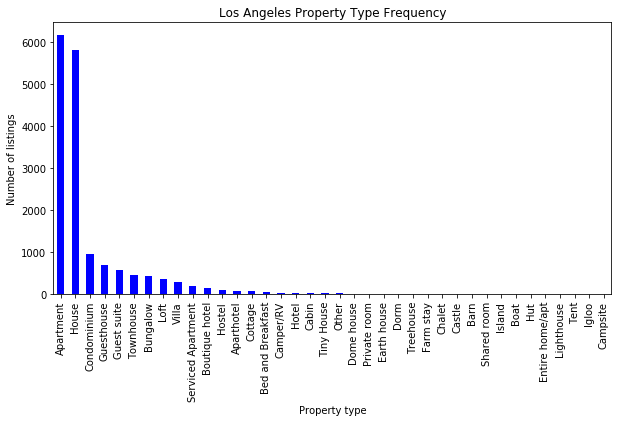

In [1161]:
property_type_count.plot.bar(color = 'blue', figsize =(10,5), title = 'Los Angeles Property Type Frequency')
plt.xlabel('Property type');
plt.ylabel('Number of listings');

In [1162]:
#Find out the proportion of superhosts in a particular segment of property
    #INPUT:
    #factors_df - original raw listing df
    #col - column that segments the listing into different categories
    #OUTPUT:
    #superhost_df - dataframe with 'perc' column outlining the % of listings that are superhosts


def superhost_proportion(factors_df, col):
    
    list_super_neigh = factors_df.groupby([col,'host_is_superhost']).size().unstack()
    list_super_neigh['perc'] = list_super_neigh['t']/ (list_super_neigh['f'] + list_super_neigh['t'])
    superhost_df = list_super_neigh.sort_values(by = 'perc', ascending = False)
    
    plt.bar(superhost_df.index, superhost_df['perc'])
    plt.xticks(rotation = 'vertical')
    plt.show()
    return superhost_df

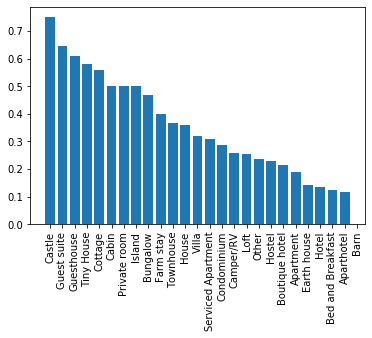

In [1163]:
# Proportion of superhosts in different property types
superhost_proptype = superhost_proportion(factors_df, 'property_type')

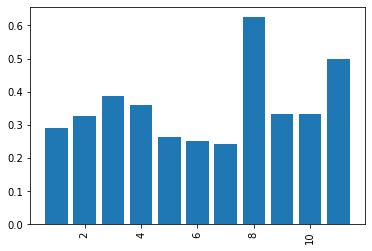

In [1164]:
# Proportion of superhosts in different property types
superhost_bedrooms = superhost_proportion(factors_df, 'bedrooms')

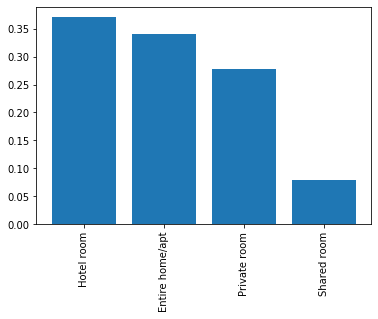

In [1165]:
# Proportion of superhosts in different property types
superhost_roomtype = superhost_proportion(factors_df, 'room_type')

In [1166]:
factors_df['property_type'].replace(to_replace =['Boutique hotel', 'Hostel', 'Aparthotel', 'Cottage', 'Bed and Breakfast', 'Camper/RV',  'Hotel', 'Cabin',
'Tiny House', 'Dome house', 'Private room', 'Earth house', 'Dorm', 'Treehouse', 'Farm stay', 'Chalet', 'Castle', 'Barn', 'Shared room',
'Island', 'Boat', 'Hut', 'Entire home/apt', 'Lighthouse', 'Tent', 'Igloo', 'Campsite'], value ="Other",inplace=True)

In [1167]:
property_type_count=factors_df.property_type.value_counts()
property_type_count

Apartment             6156
House                 5804
Condominium            944
Guesthouse             698
Other                  635
Guest suite            577
Townhouse              457
Bungalow               435
Loft                   364
Villa                  279
Serviced Apartment     194
Name: property_type, dtype: int64

In [1168]:
factors_df.neighbourhood_group_cleansed.unique()

array(['City of Los Angeles'], dtype=object)

#### Find apartments or houses that have at least three beds in City of Los Angeles. 

In [1169]:
filt1= ((factors_df['property_type']=='Apartment') | (factors_df['property_type']=='House'))
filt2= factors_df['beds']>=3
Filt= filt1 & filt2
factors_df2=factors_df[Filt]
factors_df2

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12320,https://www.airbnb.com/rooms/12320,20200820033927,2020-08-20,1930's Spanish Duplex on 9th St,"My place is close to Miracle Mile, Republique,...",NaN,https://a0.muscache.com/pictures/5189b109-3c72...,47757,https://www.airbnb.com/users/show/47757,Lori,2009-10-22,"Encinitas, California, United States",\r\n\r\n,NaN,NaN,75%,t,https://a0.muscache.com/im/pictures/user/b16ab...,https://a0.muscache.com/im/pictures/user/b16ab...,Mid-Wilshire,1.0,1.0,"['email', 'phone', 'facebook', 'kba']",t,f,NaN,Mid-Wilshire,City of Los Angeles,34.05864,-118.34352,Apartment,Entire home/apt,5,1.0,2,3.0,"[""Smoke alarm"", ""Private entrance"", ""Microwave...",155.0,31,120,2.0,31.0,120.0,150.0,23.0,121.1,t,0,0,0,0,2020-08-20,10,5,0,2018-08-06,2020-01-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,0.40
80714,https://www.airbnb.com/rooms/80714,20200820033927,2020-08-20,Cozy secluded Guesthouse in Garden,Sierra Bonita Guesthouse in Garden setting:<br...,NaN,https://a0.muscache.com/pictures/2080263/2d8a6...,436647,https://www.airbnb.com/users/show/436647,Cari,2011-03-11,"Los Angeles, California, United States",...Pronouced like a car with and ee at the end...,within an hour,100%,68%,t,https://a0.muscache.com/im/users/436647/profil...,https://a0.muscache.com/im/users/436647/profil...,Mid-Wilshire,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Mid-Wilshire,City of Los Angeles,34.05966,-118.35402,Apartment,Entire home/apt,4,1.0,1,3.0,"[""Carbon monoxide alarm"", ""Oven"", ""Smoke alarm...",119.0,3,60,3.0,3.0,60.0,60.0,3.0,60.0,t,18,48,78,353,2020-08-20,181,16,0,2011-03-21,2020-03-27,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,1.58
92481,https://www.airbnb.com/rooms/92481,20200820033927,2020-08-21,Good Vibrations Home+Beach+Bikes!!,<b>The space</b><br />Perfect Angeleno holiday...,NaN,https://a0.muscache.com/pictures/2175917/da22d...,479630,https://www.airbnb.com/users/show/479630,Corbin,2011-04-02,"Los Angeles, California, United States",We love LA! Kendall is a native Hollywood born...,within a few hours,100%,82%,t,https://a0.muscache.com/im/users/479630/profil...,https://a0.muscache.com/im/users/479630/profil...,Westchester/Playa Del Rey,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Westchester,City of Los Angeles,33.96781,-118.41985,House,Entire home/apt,6,2.0,3,3.0,"[""TV"", ""Indoor fireplace"", ""Dryer"", ""Kitchen"",...",315.0,7,14,7.0,7.0,14.0,14.0,7.0,14.0,t,22,52,82,357,2020-08-21,3,1,0,2012-07-07,2020-01-01,93.0,10.0,7.0,9.0,10.0,10.0,9.0,f,2,2,0,0,0.03
137215,https://www.airbnb.com/rooms/137215,20200820033927,2020-08-22,Sage in Quiet Canyon with 2 Furnished Patios,No Shared

In [1170]:
# analyzing the prices for different room type and property type

host_is_superhost_Data = factors_df2.groupby(['room_type','property_type']).host_is_superhost.count()

In [1171]:
host_is_superhost_Data

room_type        property_type
Entire home/apt  Apartment         870
                 House            2001
Private room     Apartment          33
                 House              98
Shared room      Apartment          29
                 House             142
Name: host_is_superhost, dtype: int64

In [1172]:
factors_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [1173]:
factors_df.groupby(['neighbourhood_cleansed','room_type']).host_is_superhost.count()

neighbourhood_cleansed  room_type      
Adams-Normandie         Entire home/apt      9
                        Private room        29
                        Shared room          1
Arleta                  Entire home/apt      2
                        Private room         3
Arlington Heights       Entire home/apt     13
                        Private room        33
                        Shared room         76
Atwater Village         Entire home/apt     64
                        Private room        18
Baldwin Hills/Crenshaw  Entire home/apt     31
                        Private room        37
                        Shared room          2
Bel-Air                 Entire home/apt     47
                        Private room         7
Beverly Crest           Entire home/apt    112
                        Private room        19
Beverly Grove           Entire home/apt    285
                        Hotel room           2
                        Private room        94
                    

In [1174]:
factors_df.groupby(['neighbourhood_group_cleansed','room_type']).host_is_superhost.count()

neighbourhood_group_cleansed  room_type      
City of Los Angeles           Entire home/apt    10552
                              Hotel room            81
                              Private room        5012
                              Shared room          898
Name: host_is_superhost, dtype: int64

In [1175]:
factors_df['host_is_superhost'].head(10)

id
2708     t
5728     t
5729     t
5843     t
6033     f
6931     t
7992     t
9376     f
10760    f
11511    t
Name: host_is_superhost, dtype: object

In [1176]:
#convert host_is_superhost to boolean

def integervalues(value):
    if value =='f':
        return 0
    else:
        return 1

In [1177]:
factors_df['Superhost']=factors_df['host_is_superhost'].apply(integervalues)          #Make sure to not put the arguments in the parentheses

In [1178]:
factors_df[['host_is_superhost', 'Superhost']].head(5)

,host_is_superhost,Superhost
id,,
2708,t,1
5728,t,1
5729,t,1
5843,t,1
6033,f,0


In [1179]:
#convert host_is_superhost to boolean

def function2(value):
    if value =='f':
        return 0
    else:
        return 1

In [1180]:
factors_df['Prof_pic']=factors_df['host_has_profile_pic'].apply(function2)          #Make sure to not put the arguments in the parentheses

In [1181]:
factors_df[['host_has_profile_pic', 'Prof_pic']].head(5)

,host_has_profile_pic,Prof_pic
id,,
2708,t,1
5728,t,1
5729,t,1
5843,t,1
6033,t,1


In [1182]:
#convert host_is_superhost to boolean

def function3(value):
    if value =='f':
        return 0
    else:
        return 1

In [1183]:
factors_df['Verified']=factors_df['host_identity_verified'].apply(function3)          #Make sure to not put the arguments in the parentheses

In [1184]:
factors_df[['host_identity_verified', 'Verified']].head(5)

,host_identity_verified,Verified
id,,
2708,t,1
5728,t,1
5729,t,1
5843,t,1
6033,t,1


In [1185]:
#convert host_is_superhost to boolean

def function4(value):
    if value =='f':
        return 0
    else:
        return 1

In [1186]:
factors_df['has_availability']=factors_df['has_availability'].apply(function4)          #Make sure to not put the arguments in the parentheses

In [1187]:
factors_df[['has_availability']].head(5)

,has_availability
id,
2708,1
5728,1
5729,1
5843,1
6033,1


In [1188]:
#convert host_is_superhost to boolean

def function5(value):
    if value =='f':
        return 0
    else:
        return 1

In [1189]:
factors_df['instant_bookable']=factors_df['instant_bookable'].apply(function5)          #Make sure to not put the arguments in the parentheses

In [1190]:
factors_df[['instant_bookable']].head(5)

,instant_bookable
id,
2708,1
5728,0
5729,0
5843,0
6033,1


In [1191]:
factors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16543 entries, 2708 to 45031552
Data columns (total 73 columns):
listing_url                                     16543 non-null object
scrape_id                                       16543 non-null int64
last_scraped                                    16543 non-null datetime64[ns]
name                                            16543 non-null object
description                                     16092 non-null object
neighborhood_overview                           11038 non-null object
picture_url                                     16543 non-null object
host_id                                         16543 non-null int64
host_url                                        16543 non-null object
host_name                                       16543 non-null object
host_since                                      16543 non-null object
host_location                                   16512 non-null object
host_about                             

In [1192]:
factors_df.drop(columns= ['listing_url','picture_url', 'host_url','host_thumbnail_url', 'host_picture_url'], inplace= True)

In [1193]:
factors_df.drop(columns= ['last_scraped','host_id','neighborhood_overview','neighbourhood','scrape_id','description','host_total_listings_count','minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d'], inplace= True)

In [1194]:
factors_df.drop(columns= ['availability_30','availability_60','availability_90'], inplace= True)

In [1195]:
factors_df.drop(columns= ['host_about'], inplace= True)

### Explanatory the data

In [1258]:
import os, time, pickle, re, json, requests

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [1197]:
factors_df.shape

(16543, 48)

In [1198]:
#### Creating Number_of_days column 

#that shows the number of days from the host_since to Today_date (which is the day this analysis is done on)

In [1199]:
factors_df.host_since = pd.to_datetime(factors_df.host_since)

In [1200]:
factors_df['Today_Date']='10/08/2020'

In [1201]:
factors_df.Today_Date = pd.to_datetime(factors_df.Today_Date)

In [1202]:
factors_df['Today_Date'].head(1)

id
2708   2020-10-08
Name: Today_Date, dtype: datetime64[ns]

In [1203]:
factors_df['Number_of_Days'] = (factors_df['Today_Date'] - factors_df['host_since']).dt.days

In [1204]:
factors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16543 entries, 2708 to 45031552
Data columns (total 50 columns):
name                                            16543 non-null object
host_name                                       16543 non-null object
host_since                                      16543 non-null datetime64[ns]
host_location                                   16512 non-null object
host_response_time                              11439 non-null object
host_response_rate                              11439 non-null object
host_acceptance_rate                            12817 non-null object
host_is_superhost                               16543 non-null object
host_neighbourhood                              14434 non-null object
host_listings_count                             16543 non-null float64
host_verifications                              16543 non-null object
host_has_profile_pic                            16543 non-null object
host_identity_verified              

In [1205]:
factors_df['Number_of_Days'].head(2)

id
2708    4405
5728    4235
Name: Number_of_Days, dtype: int64

## Regression

In [1206]:
#Split the data

factors_df_train, factors_df_test = train_test_split(factors_df, test_size=0.2, random_state=42, stratify=factors_df['Superhost'])
factors_df_train, factors_df_val = train_test_split(factors_df_train, test_size=0.25, random_state=99) 

# ensure our dataset splits are of the % sizes we want
total_size = len(factors_df_train) + len(factors_df_val) + len(factors_df_test)
print("train:", len(factors_df_train), "=>", len(factors_df_train) / total_size)
print("val:", len(factors_df_val), " =>", len(factors_df_val) / total_size)
print("test:", len(factors_df_test), "=>", len(factors_df_test) / total_size)

train: 9925 => 0.5999516411775373
val: 3309  => 0.20002417941123132
test: 3309 => 0.20002417941123132


In [1207]:
#Remove our target Superhost from the current dataframe & make a seprate prediction df

# training
x_train = factors_df_train.drop(['host_is_superhost','Superhost'], axis=1)
y_train = pd.DataFrame(data=factors_df_train['Superhost'], columns=["Superhost"])

# val
x_val = factors_df_val.drop(['host_is_superhost','Superhost'], axis=1)
y_val = pd.DataFrame(data=factors_df_val['Superhost'], columns=["Superhost"])

# test
x_test = factors_df_test.drop(['host_is_superhost','Superhost'], axis=1)
y_test = pd.DataFrame(data=factors_df_test['Superhost'], columns=["Superhost"])

In [1208]:
factors_df['property_type'].value_counts()

Apartment             6156
House                 5804
Condominium            944
Guesthouse             698
Other                  635
Guest suite            577
Townhouse              457
Bungalow               435
Loft                   364
Villa                  279
Serviced Apartment     194
Name: property_type, dtype: int64

In [1209]:
x_val.shape

(3309, 48)

In [1210]:
x_test.shape

(3309, 48)

In [1211]:
# Cleaning based on training set

for col in x_train.columns:
    print(col, ":", np.sum([x_train[col].isnull()]))

name : 0
host_name : 0
host_since : 0
host_location : 16
host_response_time : 3047
host_response_rate : 3047
host_acceptance_rate : 2226
host_neighbourhood : 1271
host_listings_count : 0
host_verifications : 0
host_has_profile_pic : 0
host_identity_verified : 0
neighbourhood_cleansed : 0
neighbourhood_group_cleansed : 0
latitude : 0
longitude : 0
property_type : 0
room_type : 0
accommodates : 0
bathrooms_text : 0
bedrooms : 0
beds : 95
amenities : 0
price : 0
minimum_nights : 0
maximum_nights : 0
has_availability : 0
availability_365 : 0
number_of_reviews : 0
first_review : 2254
last_review : 2254
review_scores_rating : 2403
review_scores_accuracy : 2429
review_scores_cleanliness : 2429
review_scores_checkin : 2433
review_scores_communication : 2429
review_scores_location : 2434
review_scores_value : 2436
instant_bookable : 0
calculated_host_listings_count : 0
calculated_host_listings_count_entire_homes : 0
calculated_host_listings_count_private_rooms : 0
calculated_host_listings_count

In [1212]:
#Drop columns that have more 20% or more missing values

x_train = x_train.drop(['host_response_time','host_response_rate','host_acceptance_rate','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'],axis=1)

x_val = x_val.drop(['host_response_time','host_response_rate','host_acceptance_rate','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'],axis=1)

x_test = x_test.drop(['host_response_time','host_response_rate','host_acceptance_rate','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'],axis=1)

In [1213]:
x_train = x_train.drop(['host_since','host_name','host_location','host_neighbourhood','host_verifications','amenities'],axis=1)

x_val = x_val.drop(['host_since','host_name','host_location','host_neighbourhood','host_verifications','amenities'],axis=1)

x_test = x_test.drop(['host_since','host_name','host_location','host_neighbourhood','host_verifications','amenities'],axis=1)

In [1214]:
x_train = x_train.drop(['host_has_profile_pic','host_identity_verified','name'],axis=1)

x_val = x_val.drop(['host_has_profile_pic','host_identity_verified','name'],axis=1)

x_test = x_test.drop(['host_has_profile_pic','host_identity_verified','name'],axis=1)

In [1215]:
x_train = x_train.drop(['calculated_host_listings_count'],axis=1)
x_val = x_val.drop(['calculated_host_listings_count'],axis=1)
x_test = x_test.drop(['calculated_host_listings_count'],axis=1)

In [1216]:
x_train = x_train.drop(['Today_Date'],axis=1)
x_val = x_val.drop(['Today_Date'],axis=1)
x_test = x_test.drop(['Today_Date'],axis=1)

In [1217]:
x_train = x_train.drop(['beds'],axis=1)

x_val = x_val.drop(['beds'],axis=1)

x_test = x_test.drop(['beds'],axis=1)

In [1218]:
x_train = x_train.drop(['neighbourhood_cleansed','neighbourhood_group_cleansed'],axis=1)

x_val = x_val.drop(['neighbourhood_cleansed','neighbourhood_group_cleansed'],axis=1)

x_test = x_test.drop(['neighbourhood_cleansed','neighbourhood_group_cleansed'],axis=1)

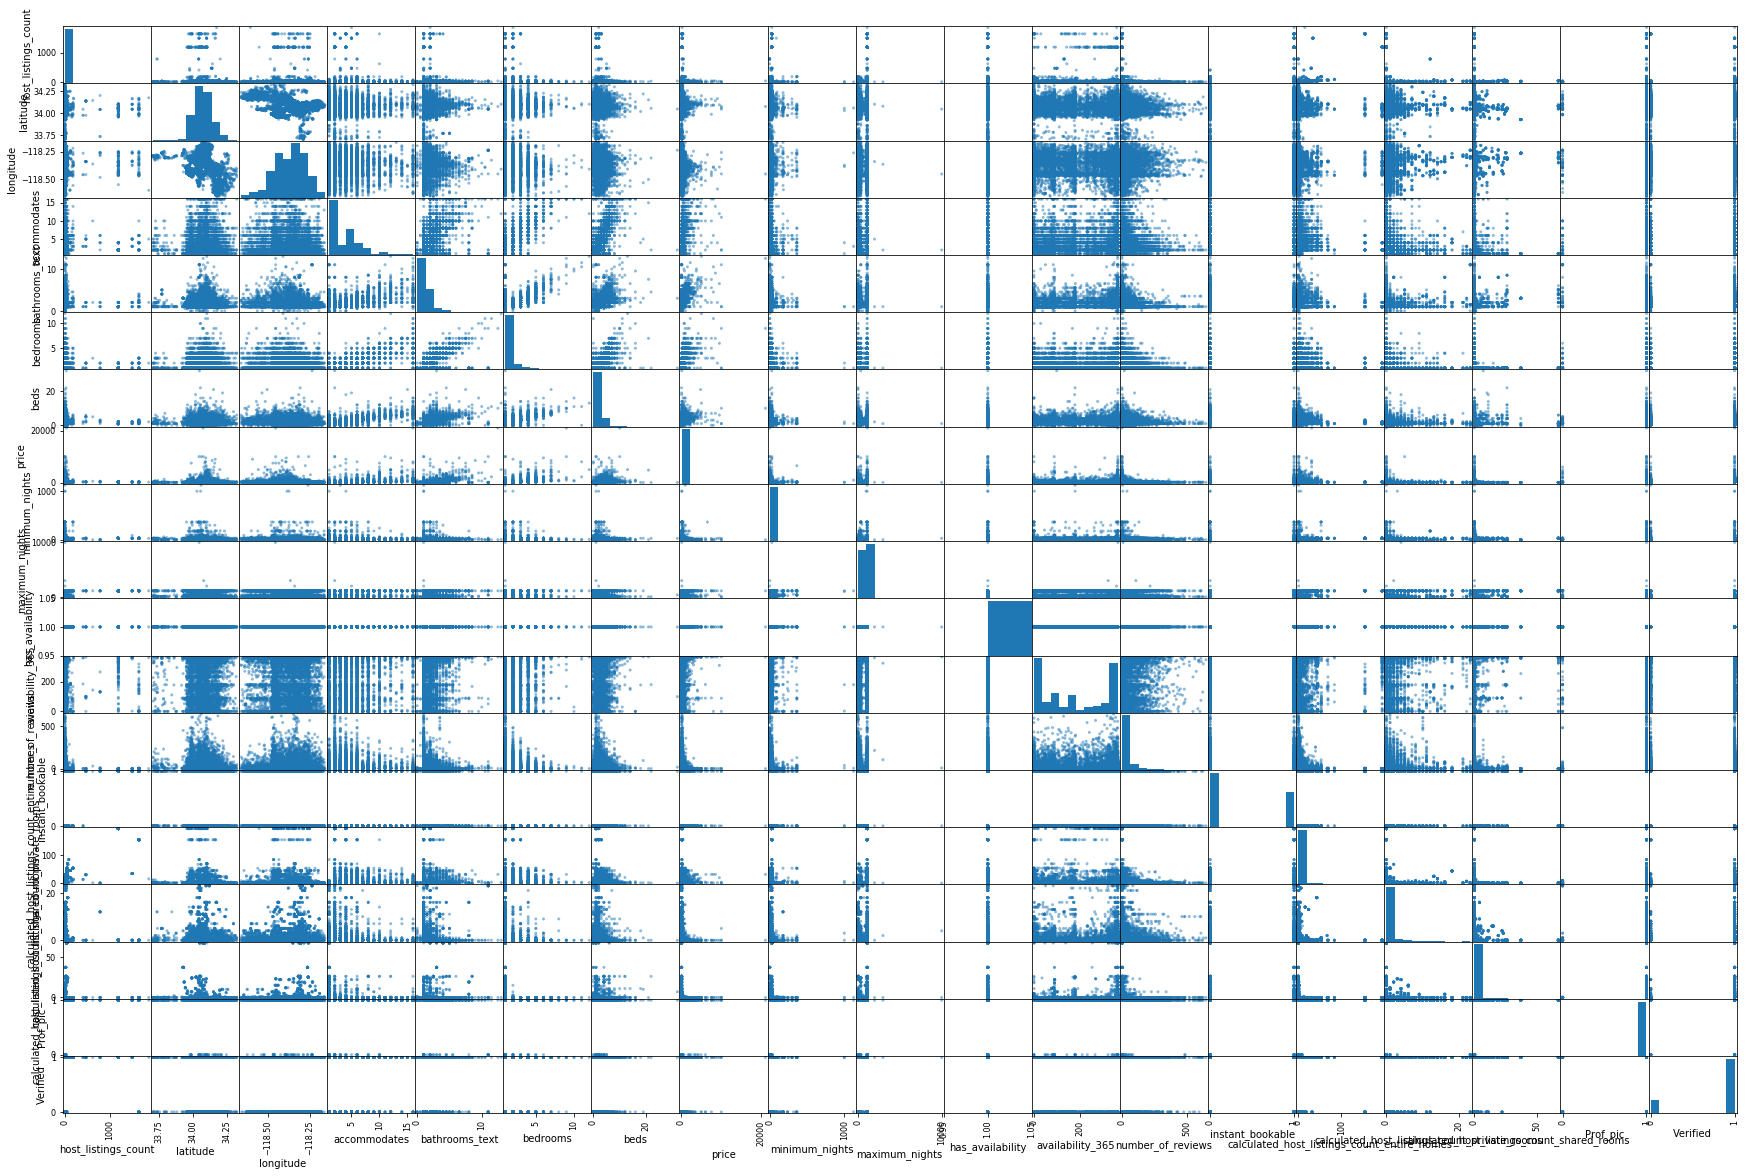

In [716]:
scatter_matrix(x_train, figsize=(30,20));

In [1219]:
x_train = pd.get_dummies(x_train, columns=['property_type','room_type'], drop_first=True)
x_val = pd.get_dummies(x_val, columns=['property_type','room_type'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['property_type','room_type'], drop_first=True)

In [1220]:
x_val.shape

(3309, 32)

In [1221]:
x_train.shape

(9925, 32)

In [1222]:
x_test.shape

(3309, 32)

In [1223]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 22388514 to 29461511
Data columns (total 32 columns):
host_listings_count                             3309 non-null float64
latitude                                        3309 non-null float64
longitude                                       3309 non-null float64
accommodates                                    3309 non-null int64
bathrooms_text                                  3309 non-null float64
bedrooms                                        3309 non-null int64
price                                           3309 non-null float64
minimum_nights                                  3309 non-null int64
maximum_nights                                  3309 non-null int64
has_availability                                3309 non-null int64
availability_365                                3309 non-null int64
number_of_reviews                               3309 non-null int64
instant_bookable                                3309 non

In [1224]:
for col in x_train.columns:
    print(col, ":", np.sum([x_train[col].isnull()]))

host_listings_count : 0
latitude : 0
longitude : 0
accommodates : 0
bathrooms_text : 0
bedrooms : 0
price : 0
minimum_nights : 0
maximum_nights : 0
has_availability : 0
availability_365 : 0
number_of_reviews : 0
instant_bookable : 0
calculated_host_listings_count_entire_homes : 0
calculated_host_listings_count_private_rooms : 0
calculated_host_listings_count_shared_rooms : 0
Prof_pic : 0
Verified : 0
Number_of_Days : 0
property_type_Bungalow : 0
property_type_Condominium : 0
property_type_Guest suite : 0
property_type_Guesthouse : 0
property_type_House : 0
property_type_Loft : 0
property_type_Other : 0
property_type_Serviced Apartment : 0
property_type_Townhouse : 0
property_type_Villa : 0
room_type_Hotel room : 0
room_type_Private room : 0
room_type_Shared room : 0


In [1225]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9925 entries, 19530608 to 24540335
Data columns (total 1 columns):
Superhost    9925 non-null int64
dtypes: int64(1)
memory usage: 155.1 KB


In [1226]:
MLE_y= y_train['Superhost'].value_counts().idxmax()
val_accuracy = y_val['Superhost'].value_counts()[MLE_y] / len(y_val['Superhost'])
val_accuracy

print("Percent Correct:",val_accuracy)

Percent Correct: 0.6869144756724086


## Logistic Regression

In [1235]:
from sklearn.linear_model import LogisticRegression

In [1236]:
logreg = LogisticRegression()

In [1237]:
logreg.fit(x_train, y_train['Superhost'])

C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1281]:
# Make Predictions on the validation set

y_hat_val = logreg.predict(x_val)
initial_score = accuracy_score(y_val['Superhost'].to_numpy(), y_hat_val)

print("our initial logistic regression model yielded accuracy score of:", initial_score)

best_accuracy = -1
best_model = None

# experiment with different values
c_vals = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
num_iters = [5, 10, 100, 1000, 5000]
for c_val in c_vals:
    for num_iter in num_iters:
        logreg = LogisticRegression(C=c_val, solver='liblinear', max_iter=num_iter, fit_intercept=False)
        logfit=logreg.fit(x_train, y_train['Superhost'])
        y_hat_val = logreg.predict(x_val)
        cur_accuracy = accuracy_score(y_val['Superhost'].to_numpy(), y_hat_val)

        if cur_accuracy > best_accuracy:
            best_accuracy = cur_accuracy
            best_model = logreg

print("best logistic regression model:", logreg, "yielded an accuracy score:", best_accuracy)
print("its learned coefficients:", len(best_model.coef_[0]))
print("the coefficients align with our features:", x_val.shape)

our initial logistic regression model yielded accuracy score of: 0.7431248111211847


C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

best logistic regression model: LogisticRegression(C=10000000, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) yielded an accuracy score: 0.742520398912058
its learned coefficients: 32
the coefficients align with our features: (3309, 32)


In [1282]:
print(logfit.coef_, logfit.intercept_)

[[-2.19305594e-04 -1.75619147e-01 -3.42755142e-02 -4.66425764e-02
  -5.19926215e-03  1.41474946e-01 -3.60394306e-04  1.60886998e-03
  -1.07577913e-04 -1.06640387e-02  6.43885301e-04  9.65403636e-03
  -1.85578744e-01  6.94218455e-03 -3.20607724e-02 -6.38240581e-02
  -1.07002158e-02  2.20501511e-01  5.93180324e-05  1.12367956e+00
   6.60956562e-01  1.66499312e+00  1.50140426e+00  9.72190191e-01
   1.74867845e-01  3.61064571e-01  3.83638152e-01  9.95312183e-01
   1.05038798e+00  4.21412840e-01 -2.48377530e-01 -8.70240485e-01]] 0.0


In [1248]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

### Recursive Feature Elimination (RFE)

In [1249]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

# This helps us select features

[False  True  True False  True False False False False  True False False
  True False False  True False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[11  1  1  4  1  5 10  8 12  1  9  6  1  7  2  1  3  1 13  1  1  1  1  1
  1  1  1  1  1  1  1  1]


In [1283]:
import statsmodels.api as sm
y= y_train['Superhost']
logit_model = sm.Logit(y, x_train)   # or add sm.add_constant(x_train)
result = logit_model.fit()
print (result.summary2())

Optimization terminated successfully.
         Current function value: 0.529096
         Iterations 8
                                         Results: Logit
Model:                          Logit                      Pseudo R-squared:           0.141     
Dependent Variable:             Superhost                  AIC:                        10566.5627
Date:                           2020-10-09 14:00           BIC:                        10797.0527
No. Observations:               9925                       Log-Likelihood:             -5251.3   
Df Model:                       31                         LL-Null:                    -6109.9   
Df Residuals:                   9893                       LLR p-value:                0.0000    
Converged:                      1.0000                     Scale:                      1.0000    
No. Iterations:                 8.0000                                                           
----------------------------------------------------------

In [1278]:
result.params

host_listings_count                              -0.000293
latitude                                         -0.114672
longitude                                        -1.059331
accommodates                                     -0.046943
bathrooms_text                                   -0.013023
bedrooms                                          0.149882
price                                            -0.000400
minimum_nights                                    0.001579
maximum_nights                                   -0.000106
has_availability                               -123.426727
availability_365                                  0.000596
number_of_reviews                                 0.009740
instant_bookable                                 -0.185367
calculated_host_listings_count_entire_homes       0.007217
calculated_host_listings_count_private_rooms     -0.029494
calculated_host_listings_count_shared_rooms      -0.060697
Prof_pic                                         -0.0083